In [1]:
#Importando las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Cargamos nuestra base de datos con la que trabajaremos 
df0= pd.read_csv('datos.dat')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Creando DataFrame de los datos que utilizaremos solamente
d = {'FECHA':df0.TIMESTAMP, 'AirTC_Avg': df0.AirTC_Avg}
df2 = pd.DataFrame(data=d)
df2.head()

,AirTC_Avg,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [4]:
#Tipos de datos de nuestro DataFrame
df2.dtypes

AirTC_Avg    float64
FECHA         object
dtype: object

In [5]:
#Cambiamos el tipo de fecha: de object a Time
df2['Fecha']=pd.to_datetime(df2.apply(lambda x: x['FECHA'],1), dayfirst=True)
df2=df2.drop(['FECHA'],1)
df2.head()

,AirTC_Avg,Fecha
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
#Seleccionando solo las fechas que ocuparemos (a partir del primero de noviembre)
df2 = df2[df2.Fecha > pd.datetime(2018,11,1)]
df2.head()

,AirTC_Avg,Fecha
24936,8.89,2018-11-01 00:10:00
24937,8.66,2018-11-01 00:20:00
24938,8.52,2018-11-01 00:30:00
24939,8.47,2018-11-01 00:40:00
24940,8.58,2018-11-01 00:50:00


In [7]:
#Creando nuevas columnas para los meses, años, dias, horas y eliminamos la columna de fecha
df2['Hora']=df2['Fecha'].dt.hour
df2['Dia']=df2['Fecha'].dt.day
df2['Mes']=df2['Fecha'].dt.month
df2['Año']=df2['Fecha'].dt.year
df2=df2.drop(['Fecha'],1)

n=len(df2)
df2.index = np.arange(0,n)


df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año
0,8.89,0,1,11,2018
1,8.66,0,1,11,2018
2,8.52,0,1,11,2018
3,8.47,0,1,11,2018
4,8.58,0,1,11,2018


In [8]:
# Agrupamos la temperatura del aire en hora, mes, dia y año
# Sacamos la temperatura promedio por cada hora
df2["AirTC_Avg"]=df2.groupby(["Hora","Dia","Mes","Año"])["AirTC_Avg"].transform("mean")
df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año
0,8.624,0,1,11,2018
1,8.624,0,1,11,2018
2,8.624,0,1,11,2018
3,8.624,0,1,11,2018
4,8.624,0,1,11,2018


In [9]:
#Creamos dos columnas nuevas, una para la temperatura máxima por día (TMAX) y para la temperatura mínima por día (TMIN)
df2["Tmin"]=df2.groupby(["Dia","Mes","Año"])["AirTC_Avg"].transform("min")
df2["Tmax"]=df2.groupby(["Dia","Mes","Año"])["AirTC_Avg"].transform("max")
df2["Hora"]=df2.Hora
df2["Dia"]=df2.Dia
df2["Mes"]=df2.Mes
df2["Año"]=df2.Año
df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año,Tmin,Tmax
0,8.624,0,1,11,2018,6.806833,28.621667
1,8.624,0,1,11,2018,6.806833,28.621667
2,8.624,0,1,11,2018,6.806833,28.621667
3,8.624,0,1,11,2018,6.806833,28.621667
4,8.624,0,1,11,2018,6.806833,28.621667


In [10]:
# Ya que solo ocupamos la temperatura promedio por hora, eliminamos las columnas que estan duplicadas (cada 5 renglones)
df2=df2.drop_duplicates()
f=len(df2)
df2.index = np.arange(0,f)
df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año,Tmin,Tmax
0,8.624000,0,1,11,2018,6.806833,28.621667
1,8.493333,1,1,11,2018,6.806833,28.621667
2,8.690000,2,1,11,2018,6.806833,28.621667
3,8.846667,3,1,11,2018,6.806833,28.621667
4,7.397500,4,1,11,2018,6.806833,28.621667


In [11]:
# Calculamos la columna de UF24
count=[]
for i in range (0,len(df2)):
    rr=df2.AirTC_Avg[i]
    if (rr<1.4) :
        j=0
        
    if (rr>=1.5 and rr<=2.4) :
        j=0.5   
        
    if (rr>=2.5 and rr<=9.1) :
        j=1
        
    if (rr>=9.2 and rr<=12.4) :
        j=0.5
        
    if (rr>=12.5 and rr<=15.9) :
        j=0
        
    if (rr>=16 and rr<=18) :
        j=-0.5
        
    if (rr>18) :
        j=-1

    count.append(j)
df2["UF24"]=count
df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año,Tmin,Tmax,UF24
0,8.624000,0,1,11,2018,6.806833,28.621667,1.0
1,8.493333,1,1,11,2018,6.806833,28.621667,1.0
2,8.690000,2,1,11,2018,6.806833,28.621667,1.0
3,8.846667,3,1,11,2018,6.806833,28.621667,1.0
4,7.397500,4,1,11,2018,6.806833,28.621667,1.0


In [12]:
#Para hacer las gráficas ocupamos tener un DataFrame con la infomracón que necesitamos.
#Quitamos las columas de temperatura del aire, fecha y UF24
df3=df2.drop(["AirTC_Avg","Hora","UF24"],1)
df3.head()

,Dia,Mes,Año,Tmin,Tmax
0,1,11,2018,6.806833,28.621667
1,1,11,2018,6.806833,28.621667
2,1,11,2018,6.806833,28.621667
3,1,11,2018,6.806833,28.621667
4,1,11,2018,6.806833,28.621667


In [13]:
#Quitamos los datos repetidos en al Tmax y Tmin
df3=df3.drop_duplicates()
n=len(df3)
df3.index = np.arange(0,n)
df3.head()


,Dia,Mes,Año,Tmin,Tmax
0,1,11,2018,6.806833,28.621667
1,2,11,2018,10.248333,30.960000
2,3,11,2018,10.473333,29.998333
3,4,11,2018,11.670000,31.243333
4,5,11,2018,11.435000,31.093333


In [14]:
#Cramos un Dataframe que contenga una columa de Fecha
df4=pd.DataFrame({})
df4["day"]=df3.Dia
df4["month"]=df3.Mes
df4["year"]=df3.Año
n=len(df4)
df4.index = np.arange(0,n)
df4.head()
j=pd.to_datetime(df4)

df3["Fecha"]=j

df3.head()

,Dia,Mes,Año,Tmin,Tmax,Fecha
0,1,11,2018,6.806833,28.621667,2018-11-01
1,2,11,2018,10.248333,30.960000,2018-11-02
2,3,11,2018,10.473333,29.998333,2018-11-03
3,4,11,2018,11.670000,31.243333,2018-11-04
4,5,11,2018,11.435000,31.093333,2018-11-05


In [15]:
#Quitamos la columa del año
df4=df3.drop(['Año'],1)
df4.head()

,Dia,Mes,Tmin,Tmax,Fecha
0,1,11,6.806833,28.621667,2018-11-01
1,2,11,10.248333,30.960000,2018-11-02
2,3,11,10.473333,29.998333,2018-11-03
3,4,11,11.670000,31.243333,2018-11-04
4,5,11,11.435000,31.093333,2018-11-05


In [16]:
#Quitamos las columnas de dia y mes
df4=df4.drop(['Dia'],1)
df4=df4.drop(['Mes'],1)
df4.head()

,Tmin,Tmax,Fecha
0,6.806833,28.621667,2018-11-01
1,10.248333,30.960000,2018-11-02
2,10.473333,29.998333,2018-11-03
3,11.670000,31.243333,2018-11-04
4,11.435000,31.093333,2018-11-05


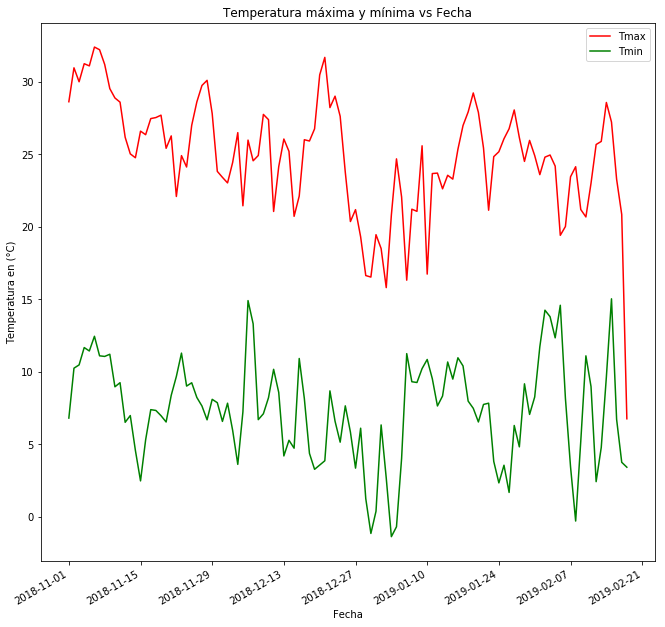

In [17]:
fig, ax = plt.subplots(figsize=(11, 11))

ax.plot(df4.Fecha, df4.Tmax, color='red')
ax.plot(df4.Fecha, df4.Tmin, color='green')
plt.title("Temperatura máxima y mínima vs Fecha")
plt.ylabel("Temperatura en (°C)")
plt.xlabel("Fecha")
plt.legend(('Tmax','Tmin'))
fig.autofmt_xdate()

plt.show()

In [18]:
#Para continuar con la gráfica donde se muestre la acumulación de horas de frío desde el primer día (Suma UF24)
#Necesitaremos nuestro Dataframe (df2)
df2.head()

,AirTC_Avg,Hora,Dia,Mes,Año,Tmin,Tmax,UF24
0,8.624000,0,1,11,2018,6.806833,28.621667,1.0
1,8.493333,1,1,11,2018,6.806833,28.621667,1.0
2,8.690000,2,1,11,2018,6.806833,28.621667,1.0
3,8.846667,3,1,11,2018,6.806833,28.621667,1.0
4,7.397500,4,1,11,2018,6.806833,28.621667,1.0


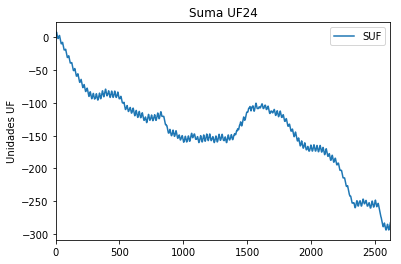

In [19]:
#Quitamos las columnas de temperatura del aire, temperatura máxima y mínima
#Creamos la gráfica (suma UF24)
df5=df2.drop(["AirTC_Avg","Tmin","Tmax"],1)
df5=df5.drop_duplicates()
n=len(df5)
df5.index = np.arange(0,n)


df6=pd.DataFrame({})
df6["day"]=df5.Dia
df6["month"]=df5.Mes
df6["year"]=df5.Año
df6["hour"]=df5.Hora
df6.index = np.arange(0,n)

j=pd.to_datetime(df6)

df5["FECHA"]=j
df5["SUF"]=df5["UF24"].cumsum()

df7 = df5[["SUF"]]
plt.figure(figsize=(20,20))
fig=plt.figure(); df7.plot(); plt.legend(loc='best')
plt.title("Suma UF24")
plt.ylabel("Unidades UF")

plt.show()

In [22]:
#Tabla con las sumas de unidades de frio 
df5.head(10)

,Hora,Dia,Mes,Año,UF24,FECHA,SUF
0,0,1,11,2018,1.0,2018-11-01 00:00:00,1.0
1,1,1,11,2018,1.0,2018-11-01 01:00:00,2.0
2,2,1,11,2018,1.0,2018-11-01 02:00:00,3.0
3,3,1,11,2018,1.0,2018-11-01 03:00:00,4.0
4,4,1,11,2018,1.0,2018-11-01 04:00:00,5.0
5,5,1,11,2018,1.0,2018-11-01 05:00:00,6.0
6,6,1,11,2018,1.0,2018-11-01 06:00:00,7.0
7,7,1,11,2018,1.0,2018-11-01 07:00:00,8.0
8,8,1,11,2018,0.0,2018-11-01 08:00:00,8.0
9,9,1,11,2018,-1.0,2018-11-01 09:00:00,7.0
